<a href="https://colab.research.google.com/github/youngjooo/DCC-project/blob/main/model/beautyGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/kairess/BeautyGAN.git

Cloning into 'BeautyGAN'...
remote: Enumerating objects: 107, done.
remote: Total 107 (delta 0), reused 0 (delta 0), pack-reused 107
Receiving objects: 100% (107/107), 13.63 MiB | 28.03 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
import numpy as np

모델 가져오기

In [ ]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('/content/BeautyGAN/models/shape_predictor_5_face_landmarks.dat')

In [ ]:
def align_faces(img):
    dets = detector(img, 1)
    
    objs = dlib.full_object_detections()

    for detection in dets:
        s = sp(img, detection)
        objs.append(s)
        
    faces = dlib.get_face_chips(img, objs, size=256, padding=0.35)
    
    return faces

필요 모델 다운로드

In [ ]:
!gdown --id 1EY2IIBiaQAkrf1oeX67jGj4mlyeABfXx --output /content/BeautyGAN/models/checkpoint
!gdown --id 1USUZNFad8jES--l-xSjGhX7ZkXGH_MdL --output /content/BeautyGAN/models/model.data-00000-of-00001
!gdown --id 1i1OeN5QNVF3OHERYOPwrlwoZvLe11B1c --output /content/BeautyGAN/models/model.index
!gdown --id 1lvy9eizeDGAeEVraVGYxQUn_vikpnNzZ --output /content/BeautyGAN/models/model.meta

Downloading...
From: https://drive.google.com/uc?id=1EY2IIBiaQAkrf1oeX67jGj4mlyeABfXx
To: /content/BeautyGAN/models/checkpoint
100% 67.0/67.0 [00:00<00:00, 55.9kB/s]
Downloading...
From: https://drive.google.com/uc?id=1USUZNFad8jES--l-xSjGhX7ZkXGH_MdL
To: /content/BeautyGAN/models/model.data-00000-of-00001
359MB [00:02, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1i1OeN5QNVF3OHERYOPwrlwoZvLe11B1c
To: /content/BeautyGAN/models/model.index
100% 10.2k/10.2k [00:00<00:00, 8.19MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lvy9eizeDGAeEVraVGYxQUn_vikpnNzZ
To: /content/BeautyGAN/models/model.meta
14.6MB [00:00, 127MB/s]


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#tensorflow 1.x 버전 사용

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
sess = tf.compat.v1.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.import_meta_graph('/content/BeautyGAN/models/model.meta')
saver.restore(sess, tf.train.latest_checkpoint('/content/BeautyGAN/models'))
graph = tf.get_default_graph()

X = graph.get_tensor_by_name('X:0') # source
Y = graph.get_tensor_by_name('Y:0') # reference
Xs = graph.get_tensor_by_name('generator/xs:0') # output

INFO:tensorflow:Restoring parameters from /content/BeautyGAN/models/model


In [ ]:
def preprocess(img):
    return img.astype(np.float32) / 127.5 - 1.

def postprocess(img):
    return ((img + 1.) * 127.5).astype(np.uint8)

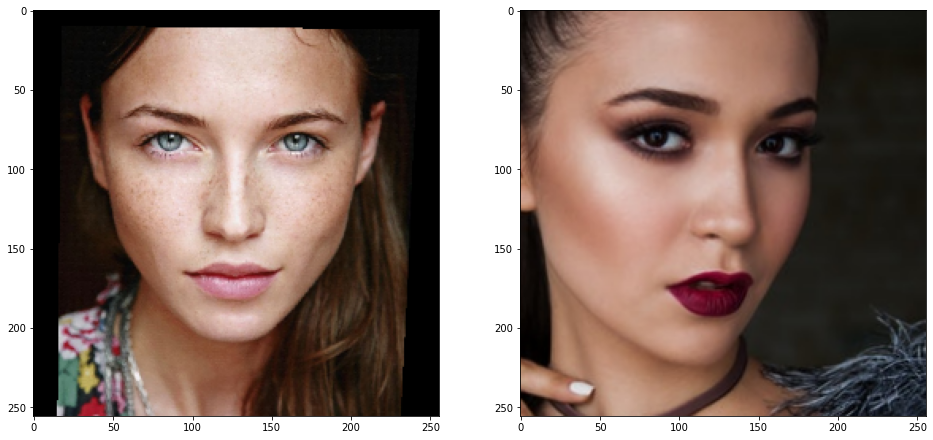

In [ ]:
img1 = dlib.load_rgb_image('/content/BeautyGAN/imgs/no_makeup/xfsy_0503.png') #화장 입힐 배경 이미지 불러오기
img1_faces = align_faces(img1)

img2 = dlib.load_rgb_image('/content/BeautyGAN/imgs/07.jpg') #입힐 화장 이미지 불러오기
img2_faces = align_faces(img2)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))
axes[0].imshow(img1_faces[0])
axes[1].imshow(img2_faces[0])

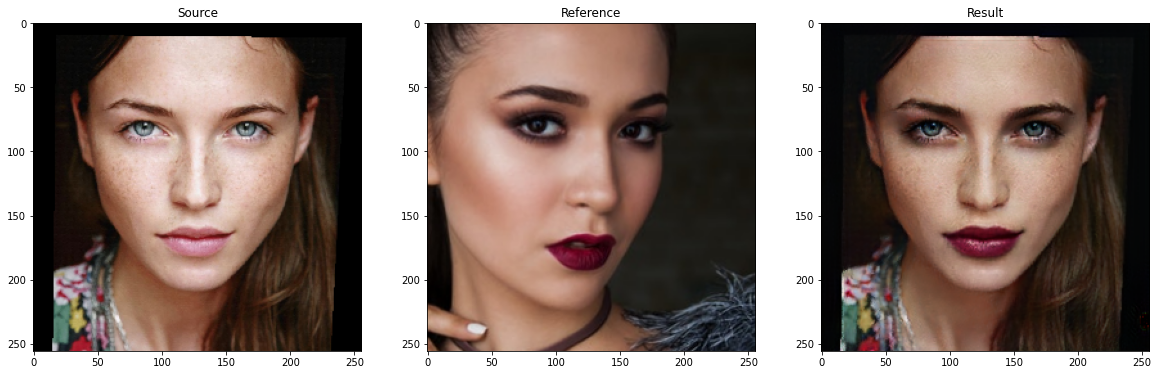

In [ ]:
src_img = img1_faces[0]
ref_img = img2_faces[0]

X_img = preprocess(src_img)
X_img = np.expand_dims(X_img, axis=0)

Y_img = preprocess(ref_img)
Y_img = np.expand_dims(Y_img, axis=0)

output = sess.run(Xs, feed_dict={
    X: X_img,
    Y: Y_img
})

output_img = postprocess(output[0])

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].set_title('Source')
axes[0].imshow(src_img)
axes[1].set_title('Reference')
axes[1].imshow(ref_img)
axes[2].set_title('Result')
axes[2].imshow(output_img)